# Experiment Evaluation
Look at experiment results, compare them and find representative examples for the thesis motivation.

In [ ]:
import os
from glob import glob
import yaml
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("..")

### Load Experiment Results

In [37]:
experiment_name = "unimodal_gaussian"

path = f"results\\{experiment_name}\\**\\"
files = glob(path + "*.yaml", recursive=True)

df = pd.DataFrame()
for file in files:
    # flatten yaml and convert to dataframe (concat column names with _)
    df_temp = yaml.load(open(file), Loader=yaml.FullLoader)
    # flatten the dictionary
    df_temp = pd.json_normalize(df_temp, sep="_")

    # add file name as column
    df_temp["file"] = file.split("/")[-1]
    # add to dataframe
    df = pd.concat([df, df_temp], ignore_index=True)

df

,data_config_id,experiment_id,data_covs,data_means,data_n_samples,data_weights,parameters_burnin,parameters_init_m,parameters_mcmc_samples,parameters_mdecay,parameters_mresampling,parameters_n_batches,parameters_step_size,results_metrics_nll,results_metrics_wasserstein,results_plot_path,results_runtime_seconds,results_trajectory_path,file
0,2,20250424_222856,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",4000,0.01,0.0,5,0.01,3.129660,0.000024,results\unimodal_gaussian\data_00da76\20250424...,37.177006,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
1,2,20250424_222957,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",4000,0.05,0.0,5,0.01,3.218345,0.000024,results\unimodal_gaussian\data_00da76\20250424...,45.586549,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
2,2,20250424_223051,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",4000,0.01,0.0,5,0.05,3.574145,0.000017,results\unimodal_gaussian\data_00da76\20250424...,39.545371,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
3,2,20250424_223155,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",4000,0.05,0.0,5,0.05,3.513764,0.000019,results\unimodal_gaussian\data_00da76\20250424...,48.835022,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
4,2,20250424_223258,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",4000,0.01,0.0,5,0.01,3.126740,0.000024,results\unimodal_gaussian\data_00da76\20250424...,44.849559,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
5,2,20250424_223353,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",4000,0.05,0.0,5,0.01,3.218595,0.000024,results\unimodal_gaussian\data_00da76\20250424...,41.479328,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
6,2,20250424_223453,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",4000,0.01,0.0,5,0.05,3.573700,0.000017,results\unimodal_gaussian\data_00da76\20250424...,42.413749,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
7,2,20250424_223552,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",4000,0.05,0.0,5,0.05,3.515145,0.000019,results\unimodal_gaussian\data_00da76\20250424...,43.082573,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
8,1,20250424_222055,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",4000,0.01,0.0,5,0.01,3.881019,0.000017,results\unimodal_gaussian\data_7927f1\20250424...,39.609871,results\unimodal_gaussian\data_7927f1\20250424...,results\unimodal_gaussian\data_7927f1\20250424...
9,1,20250424_222153,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",4000,0.05,0.0,5,0.01,4.662322,0.000013,results\unimodal_gaussian\data_7927f1\20250424...,40.894666,results\unimodal_gaussian\data_7927f1\20250424...,results\unimodal_gaussian\data_7927f1\20250424...


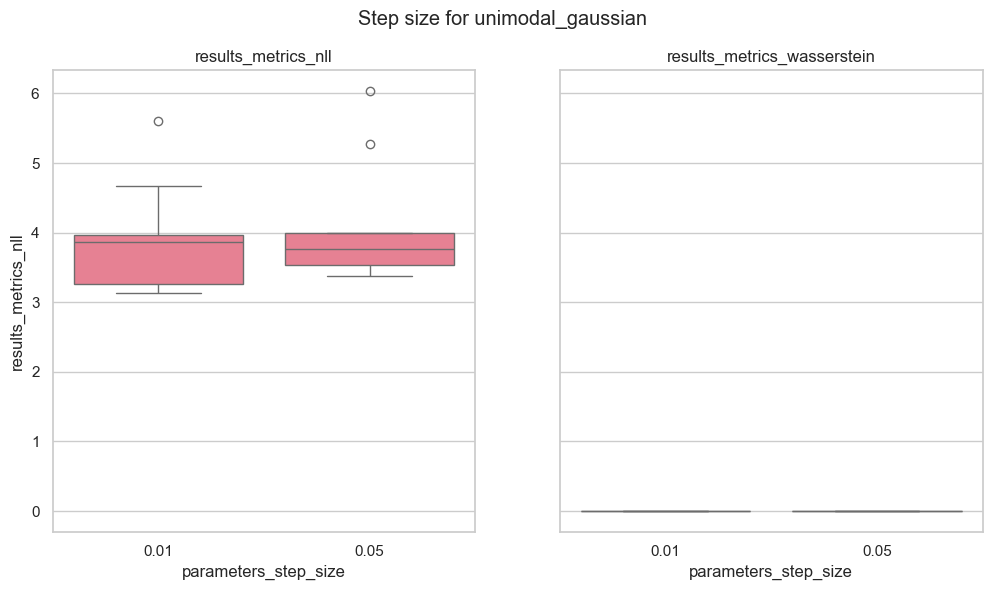

In [38]:
metrics = ["results_metrics_nll", "results_metrics_wasserstein"]
param = "parameters_step_size"


fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle(f"Step size for {experiment_name}")
for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x=param, y=metric, ax=axs[i])
    axs[i].set_title(metric)